In [97]:
import sys
!{sys.executable} -m pip install keras

In [98]:
# import libraries
import numpy as np
from random import randint
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist

In [99]:
#Train and test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

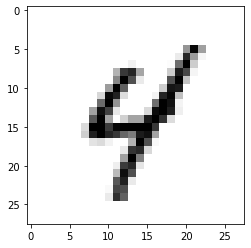

In [100]:
# Show randomly from our training data
plt.imshow(x_train[randint(0, x_train.shape[0])], cmap='gray_r')

In [101]:
# Transform data

# The image size is the number of pixels in image
image_size = 28*28
# transform matrix into a vector
x_train = x_train.reshape(x_train.shape[0], image_size)
# cast into floats (since we will need data to be between 0 and 1 [0 being white and 1 being black])
x_train = x_train.astype('float32')
# Normalize to be between 0 and 1
x_train /= 255

# transform matrix into a vector
x_test = x_test.reshape(x_test.shape[0], image_size)
# cast into floats (since we will need data to be between 0 and 1 [0 being white and 1 being black])
x_test = x_test.astype('float32')
# Normalize to be between 0 and 1
x_test /= 255

In [102]:
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [103]:
from keras.models import Sequential

# Sequential model
Linear stack of layers.
1 input 1 output

In [113]:
model = Sequential()

# Artificial Neural Networks Layers
- Dense (Fully interconnected)
- Convolucionary (Image data)
- Recurrent (For time series)
- etc...

In [105]:
# Fully interconnected layer (each node in current is connected to each node in next layer)
from keras.layers import Dense

In [114]:
# Define input layer
layer_input = Dense(units=512, activation='sigmoid', input_shape=(image_size,))
# Add layer to model
model.add(layer_input)

# Activation Functions:
1. Identity (linear)
2. Binary (Non-negative input outputs 1 and negative input outputs 0)
3. Sigmoid (Logistic; contains input from 0 to 1)
4. TanH (Similar to sigmoid but from -1 to 1)
5. ArcTan (Contains from -pi/2 to pi/2)
6. ReLu (Negative input returns 0 and positive input is linear)
7. Leaky ReLu (Negative input's magnitude is reduced, positive input is linear)
8. Softmax (To impart probabilities, returns probability distribution)

In [115]:
# Define another layer
new_layer = Dense(units=512, activation='sigmoid')
model.add(new_layer)

In [116]:
# 10 units because we are trying to determine which number (from 0 to 9) corresponds to each image
layer_output = Dense(units=10, activation='softmax', input_shape=(image_size,))
model.add(layer_output)

In [117]:
# See summary of our model
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_23 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_24 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


# Loss Functions
- mean_squared_error
- mean_absolute_error
- mean_absolute_percentage_error
- mean_squared_logarithmic_error
- squared_hinge
- hinge
- categorical_hinge
- logcosh
- categorical_crossentropy
- sparse_categorical_crossentropy
- binary_crossentropy
- kullback_leibler_divergence
- poisson
- cosine_proximity

# Optimizing algorithms
- Gradient Descent
- Stochastic Gradient Descent
- Mini-Batch Gradient Descent
- Adam
- Momentum
- etc...

In [118]:
# compile model
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [119]:
# Fit the model to data and labels - also validate
model.fit(x_train, 
          y_train, 
          batch_size=10, 
          epochs=20, 
          shuffle=True, 
          verbose=True, 
          validation_split=.01)

Epoch 1/20
5940/5940 [==============================] - 26s 4ms/step - loss: 1.9101 - accuracy: 0.3676 - val_loss: 0.5445 - val_accuracy: 0.8733
Epoch 2/20
5940/5940 [==============================] - 26s 4ms/step - loss: 0.5560 - accuracy: 0.8490 - val_loss: 0.3454 - val_accuracy: 0.9183
Epoch 3/20
5940/5940 [==============================] - 24s 4ms/step - loss: 0.3979 - accuracy: 0.8873 - val_loss: 0.3002 - val_accuracy: 0.9283
Epoch 4/20
5940/5940 [==============================] - 26s 4ms/step - loss: 0.3520 - accuracy: 0.8989 - val_loss: 0.2923 - val_accuracy: 0.9317
Epoch 5/20
5940/5940 [==============================] - 26s 4ms/step - loss: 0.3307 - accuracy: 0.9051 - val_loss: 0.2913 - val_accuracy: 0.9300
Epoch 6/20
5940/5940 [==============================] - 27s 5ms/step - loss: 0.3132 - accuracy: 0.9107 - val_loss: 0.2698 - val_accuracy: 0.9433
Epoch 7/20
5940/5940 [==============================] - 26s 4ms/step - loss: 0.3061 - accuracy: 0.9098 - val_loss: 0.2834 - val_ac

In [120]:
# Make prediction on test data
predictions = model.predict(x=x_test, batch_size=10, verbose=0)

In [121]:
for prediction in predictions:
    print(prediction)

[4.7226869e-05 2.1000359e-08 2.9419616e-04 6.6808970e-03 6.0432399e-08
 2.4259265e-05 1.9560285e-10 9.9258125e-01 1.0436029e-05 3.6173494e-04]
[2.1147316e-03 1.4562120e-04 9.8859990e-01 4.5977188e-03 3.1777878e-10
 2.0743741e-03 2.2592314e-03 2.9954463e-11 2.0849051e-04 6.7460337e-10]
[9.8972372e-08 9.9261594e-01 3.5284376e-03 1.0224136e-03 2.7019369e-05
 3.8215815e-04 3.8002493e-04 6.6622009e-04 1.2250164e-03 1.5260637e-04]
[9.9911672e-01 1.6186905e-09 2.5663633e-04 4.1845098e-05 2.5552745e-07
 1.8104435e-04 2.5538920e-04 4.4476677e-05 1.1657481e-05 9.2122318e-05]
[1.4647582e-04 3.5685204e-08 3.0848552e-03 1.7485954e-05 9.4497627e-01
 4.0045448e-04 1.4393282e-03 2.3085093e-03 1.9156256e-03 4.5710970e-02]
[1.0828470e-08 9.9421871e-01 6.8087416e-04 1.1984700e-03 9.0403373e-06
 3.0100164e-05 7.5336934e-06 2.3564966e-03 1.1321187e-03 3.6658667e-04]
[3.0807524e-07 2.7273475e-07 1.3999214e-06 1.1423103e-04 9.7884661e-01
 2.7422940e-03 1.0735009e-05 5.4756983e-04 7.9397764e-03 9.7967684e-03]

 6.5550303e-05 2.1360354e-06 9.1002416e-03 2.2161279e-04 9.7791207e-01]
[1.7152123e-08 3.2382438e-06 2.1084972e-05 7.5918861e-04 1.5033419e-03
 6.5078375e-06 4.3388560e-08 1.4027423e-01 2.6955403e-04 8.5716277e-01]
[3.1349678e-08 9.9514329e-01 1.1249247e-03 1.7328382e-03 7.0810015e-06
 1.3289097e-04 4.5745837e-05 5.9976080e-04 9.1006968e-04 3.0332545e-04]
[9.6967703e-01 1.1907907e-08 9.0527808e-04 1.3731966e-06 6.3252010e-05
 4.1434001e-03 2.4937849e-02 2.2493218e-04 2.2930340e-06 4.4648696e-05]
[2.3172244e-03 2.2282497e-06 1.3455306e-04 8.5439915e-03 1.0711038e-03
 9.7666126e-01 4.4165569e-04 2.4156438e-06 1.0110709e-03 9.8146042e-03]
[2.7420004e-03 6.8952882e-04 9.2189252e-01 2.8006170e-02 4.7889785e-08
 9.4467523e-03 7.1339216e-04 9.6595976e-09 3.6509503e-02 2.3864649e-07]
[1.2090126e-07 2.8345196e-06 5.9447694e-04 9.9926943e-01 1.9560114e-08
 1.9726682e-05 2.4110698e-09 3.1599701e-10 1.1335911e-04 1.1028748e-09]
[3.8151620e-06 1.3829617e-09 1.5795931e-04 2.2685041e-03 3.5056935e-08

 9.9565550e-06 2.0908192e-05 3.4899764e-02 3.2328919e-02 7.5509280e-02]
[3.51793533e-05 1.63041659e-06 4.46404083e-05 1.19455960e-02
 4.08810437e-01 5.40593803e-01 7.42032353e-05 1.60169899e-02
 8.37756414e-03 1.40998885e-02]
[4.2382609e-02 3.8728572e-07 3.7122659e-02 1.9384002e-04 2.4054794e-02
 5.4355094e-04 8.5309839e-01 3.4439761e-02 2.6863557e-04 7.8952666e-03]
[3.2193270e-08 8.1071801e-07 6.3998226e-07 2.3414871e-06 9.9741530e-01
 1.2445725e-04 1.2677386e-05 1.1377197e-05 9.2156581e-05 2.3401156e-03]
[2.8743125e-10 5.5238599e-04 4.2212127e-06 5.4863300e-03 8.2778716e-03
 8.3566352e-05 2.8417838e-07 1.0403780e-03 5.3717726e-04 9.8401779e-01]
[8.8049477e-05 2.5862464e-05 1.3045524e-04 2.9695652e-02 1.2771794e-04
 9.4909847e-01 1.7386051e-02 1.7994796e-07 3.1959405e-03 2.5152095e-04]
[2.7931466e-07 2.0611745e-01 2.9855916e-01 9.3195468e-02 3.9294814e-06
 8.8464711e-03 3.8868165e-01 1.0105708e-06 4.5866161e-03 7.9825140e-06]
[2.6338908e-05 1.4975297e-04 1.6763910e-04 9.9088448e-01 3.

 6.5369339e-04 4.9119336e-07 2.4651349e-06 9.4386387e-01 2.1181282e-05]
[6.0447846e-08 9.6410012e-01 3.2464825e-03 1.7672822e-02 4.3474129e-04
 6.1106408e-04 6.3694628e-05 2.2056539e-04 1.1730450e-02 1.9198980e-03]
[2.4169622e-06 5.0804281e-09 4.0539086e-04 2.9235275e-07 2.2000221e-03
 3.9422521e-06 2.9321864e-05 6.4384629e-04 1.0848542e-03 9.9562991e-01]
[9.1618131e-06 1.1118909e-02 1.1478821e-02 2.5603890e-02 1.3301564e-04
 2.8075462e-02 1.2919766e-02 4.2607218e-07 9.1060609e-01 5.4445129e-05]
[1.1774196e-04 5.0087954e-04 1.7310842e-04 9.9314672e-01 8.9589548e-06
 4.4326643e-03 1.6776212e-06 2.7537675e-04 9.2998968e-04 4.1294500e-04]
[9.9210489e-01 1.6459316e-08 1.3748505e-03 7.0808706e-04 7.4196515e-07
 5.0400300e-03 2.7535938e-05 1.8498422e-04 1.4708267e-04 4.1181271e-04]
[2.3674133e-07 1.3566600e-03 2.0573628e-03 4.2498149e-02 1.2079106e-05
 1.5326751e-04 4.7995269e-07 9.2586404e-01 5.7007297e-04 2.7487556e-02]
[3.2178216e-06 1.2278828e-06 9.9644512e-01 5.1027152e-04 4.6692148e-07

 1.7403567e-05 2.6837998e-07 1.4418573e-02 1.2854541e-04 9.8149109e-01]
[1.1835020e-04 4.7714193e-06 9.9383354e-01 5.6212940e-03 7.2010793e-09
 1.6930992e-04 2.8855927e-06 8.3589214e-07 2.4911997e-04 2.7699706e-08]
[7.9159166e-05 3.6938913e-04 1.3270568e-03 1.5161450e-01 1.4193662e-05
 5.3714165e-03 1.7080623e-05 4.9411246e-06 8.3521968e-01 5.9825974e-03]
[2.0041896e-03 3.1822899e-06 1.0821778e-02 4.0898859e-04 1.0598286e-03
 7.5725704e-03 9.7676784e-01 1.8291155e-05 1.3425730e-03 8.0249845e-07]
[1.7008619e-05 1.5044168e-06 9.7306031e-01 2.3327725e-02 4.3873642e-09
 4.3095833e-06 6.3896472e-08 2.3550315e-04 3.3458807e-03 7.6171568e-06]
[3.1882480e-06 4.8855197e-04 4.7948465e-04 1.8264927e-03 3.1852411e-05
 1.8093206e-03 1.3086078e-06 9.2111951e-01 5.2380248e-04 7.3716506e-02]
[9.9949205e-01 1.3657042e-10 6.3887375e-05 8.9766081e-06 9.5851661e-08
 1.6467862e-05 6.0113609e-05 4.2359956e-05 5.0148545e-05 2.6586527e-04]
[9.9825650e-01 1.9767821e-09 5.0708069e-04 4.4039782e-05 9.3265828e-07

 1.0675374e-02 2.7121753e-01 2.7985740e-04 3.0363924e-04 6.3492416e-04]
[2.6865902e-07 1.7161976e-06 1.3862902e-04 9.9652785e-01 2.5853546e-05
 3.7167981e-04 7.7752144e-10 2.4641972e-07 2.8792138e-03 5.4441472e-05]
[1.3143807e-06 1.4433576e-07 1.1287184e-06 1.0478403e-03 4.7389469e-03
 3.2568737e-03 1.8660060e-07 5.2082620e-04 3.3530344e-03 9.8707968e-01]
[6.3848279e-06 8.3885528e-04 4.7461839e-05 9.9624288e-01 8.5260339e-08
 1.7516366e-03 1.5169491e-06 1.4061297e-06 1.0989712e-03 1.0747638e-05]
[1.1392933e-08 5.1173610e-03 7.7639294e-01 1.1392531e-03 2.5889673e-03
 9.0444795e-05 1.6920719e-03 1.7116894e-01 3.8978763e-02 2.8313342e-03]
[7.1540259e-02 1.6266049e-06 1.1400076e-02 1.2424746e-02 2.4574474e-04
 3.1577114e-02 2.2628175e-05 1.6975664e-06 8.7165099e-01 1.1351348e-03]
[9.4555980e-06 1.3160444e-10 7.3160736e-05 2.1034512e-07 1.5577476e-03
 1.0925770e-06 2.0247812e-06 2.2554530e-04 1.6924572e-04 9.9796152e-01]
[9.9917150e-01 7.2733858e-10 7.5779163e-04 4.0170294e-06 7.9225049e-10

 5.0273247e-04 8.0368882e-01 9.7388380e-08 5.8369426e-04 1.1863121e-06]
[5.7137169e-07 1.9510787e-10 1.4479850e-05 1.6310878e-06 9.9419099e-01
 5.0375429e-06 1.7905975e-05 1.5994148e-04 2.3907468e-04 5.3702360e-03]
[7.0022134e-11 9.8822534e-01 7.7919300e-05 7.7803587e-03 2.5077774e-05
 2.5723941e-05 1.5688765e-05 2.4723980e-04 6.0421129e-04 2.9984985e-03]
[1.2591154e-04 3.3010787e-05 7.8249627e-01 1.6597974e-01 5.0170672e-07
 9.0895669e-04 5.6779190e-05 4.9923088e-02 1.2949698e-04 3.4626151e-04]
[7.3662143e-08 2.5127429e-04 4.0213705e-05 9.9831897e-01 1.0418253e-06
 3.5058579e-04 9.9834203e-08 1.2960534e-06 8.2357146e-04 2.1275239e-04]
[9.9836391e-01 1.4558884e-09 9.4147760e-04 2.0461810e-05 5.1826568e-08
 4.7215795e-05 4.4216716e-04 3.3920498e-06 1.1787644e-04 6.3462707e-05]
[9.9930692e-01 9.4716721e-11 2.3831582e-05 4.8814059e-07 1.8924485e-08
 6.1919121e-04 5.4805632e-06 5.3044772e-08 4.2885764e-05 1.2102377e-06]
[2.06015993e-05 1.85610421e-04 9.78565753e-01 8.61873943e-03
 6.108584

 4.9653288e-05 9.5506293e-06 1.9241676e-03 1.9403690e-04 9.0357865e-04]
[3.2879805e-07 1.9952103e-07 3.5354414e-04 9.8726287e-06 9.8676270e-01
 4.0278268e-05 1.8197107e-04 2.0078380e-04 5.6670872e-03 6.7831557e-03]
[3.1276497e-05 6.3234549e-03 2.4371420e-03 9.5165104e-01 5.7067016e-05
 2.8351841e-03 3.3058801e-05 1.2817702e-06 3.6514778e-02 1.1574055e-04]
[8.5523961e-06 1.0103633e-02 1.0007006e-03 3.7682316e-01 2.6819216e-02
 5.4340547e-01 1.8512806e-03 1.7124044e-03 2.7080715e-02 1.1194823e-02]
[2.5793401e-08 1.2881793e-02 9.8593706e-01 9.6793321e-04 2.3156306e-09
 6.2514999e-07 1.9807879e-04 1.2688284e-07 1.4438677e-05 1.2770017e-09]
[1.0663355e-06 1.3331948e-03 2.2518118e-04 2.6124267e-02 2.0403120e-05
 1.9903541e-02 1.6751376e-07 3.8520357e-05 9.5099717e-01 1.3565342e-03]
[4.4351700e-07 1.4080076e-05 2.1361706e-03 1.4421910e-03 3.9652878e-06
 6.5379695e-04 7.0889029e-05 5.9044530e-10 9.9567288e-01 5.5766782e-06]
[9.9134690e-01 4.6670051e-10 1.8549112e-04 3.2058750e-05 5.8364975e-07

 8.6575346e-05 2.5790769e-05 1.6420704e-04 2.9716874e-04 3.3803040e-04]
[2.98436674e-07 1.78972229e-01 3.20821181e-02 1.48716401e-02
 1.75824881e-01 6.49542199e-04 1.50429355e-02 6.53345557e-03
 3.13419759e-01 2.62603134e-01]
[1.2211410e-08 1.2280155e-07 1.2969891e-06 2.1764087e-04 8.0942678e-01
 1.7463669e-04 2.0951345e-06 6.3175493e-04 2.5610963e-03 1.8698460e-01]
[5.1864748e-09 9.9693561e-01 6.3935405e-04 4.7578462e-04 4.5760253e-06
 1.7744225e-05 2.5250722e-05 3.6363851e-04 1.3668226e-03 1.7130484e-04]
[1.8690778e-05 1.1292769e-06 2.1611873e-02 1.9964458e-04 9.5573258e-01
 6.3146390e-03 1.4075072e-02 1.2194581e-04 1.4500412e-04 1.7793380e-03]
[6.1797420e-04 2.5946926e-08 6.7244664e-02 1.3419592e-05 8.7802750e-01
 1.2765505e-04 4.9743950e-02 2.0704884e-03 2.4261547e-04 1.9116354e-03]
[5.4790104e-05 3.7783023e-04 1.0597300e-02 9.7312069e-01 3.2039793e-04
 5.4410719e-03 2.1522781e-05 2.6732843e-08 1.0059751e-02 6.6038474e-06]
[3.89817567e-03 1.00195663e-04 1.05727646e-04 4.88080084e-0

 9.0735631e-07 4.4628323e-09 9.8048204e-01 2.3751752e-05 1.0184098e-02]
[6.0812071e-11 9.9558723e-01 4.4746721e-05 1.0153797e-03 5.5098990e-06
 7.3225988e-06 1.8678360e-05 5.5223325e-05 2.3219986e-03 9.4405178e-04]
[5.4152856e-08 9.7754003e-07 9.9992347e-01 6.7537905e-05 7.0162925e-10
 2.4817601e-07 1.2979160e-06 1.2801835e-11 6.2607296e-06 2.7929265e-11]
[4.5420595e-08 9.9115759e-01 3.4559777e-04 3.0817541e-03 4.6219833e-05
 5.9874973e-04 1.5946396e-04 2.8440882e-03 3.0101428e-04 1.4654360e-03]
[3.1104202e-07 9.9164432e-01 2.4300707e-03 2.3483681e-03 5.0467397e-06
 3.6399547e-04 4.4141805e-05 6.8887864e-04 1.8778302e-03 5.9699174e-04]
[2.9556725e-08 1.7228880e-04 1.9220012e-03 9.8986036e-01 4.0916828e-07
 3.2849861e-05 2.5500675e-09 1.7002909e-03 4.9832240e-03 1.3286913e-03]
[8.47522974e-01 2.35860078e-08 1.44108701e-02 1.50293999e-04
 1.81983967e-04 7.00781792e-02 1.45023335e-02 3.08158551e-03
 2.34493331e-04 4.98372279e-02]
[2.0448640e-06 3.4051222e-08 2.7309623e-04 2.1018211e-07 5.

 2.4371220e-05 3.3164727e-10 9.9366575e-01 1.0009382e-05 6.2556705e-03]
[1.3644424e-04 4.8049303e-10 9.9965560e-01 1.8240193e-04 1.9864924e-06
 3.7083217e-07 2.6658622e-06 3.0952585e-09 2.0326246e-05 1.5357180e-07]
[4.4272933e-03 1.5898949e-09 9.9454451e-01 9.7809697e-04 9.1735416e-08
 3.9772708e-06 4.4710705e-06 3.8398848e-06 3.3852386e-05 3.6512840e-06]
[9.9979526e-01 4.8881801e-11 6.9197436e-06 7.6791656e-07 1.8970315e-08
 1.2342160e-04 1.0174813e-06 1.6470855e-06 2.6997493e-05 4.3907723e-05]
[9.9990785e-01 1.3907870e-11 9.7529419e-06 1.1399136e-07 1.0243951e-08
 5.5276159e-05 1.7844178e-06 7.0555508e-08 2.2035429e-05 2.9284424e-06]
[7.4392653e-10 9.9816531e-01 1.3220463e-04 7.4130768e-04 2.4251608e-06
 1.1523106e-05 4.0425166e-05 8.5270425e-05 7.1356434e-04 1.0792616e-04]
[1.6966992e-04 9.5888915e-09 5.7688071e-06 3.3561359e-04 9.7001148e-06
 4.3087080e-04 6.0288654e-09 8.1429261e-01 2.8191133e-05 1.8472758e-01]
[2.4613100e-06 2.0098199e-07 1.0040814e-04 1.9127999e-04 4.2835268e-06

 6.5376243e-04 9.9065077e-01 3.5468539e-10 2.1241314e-04 1.6186455e-06]
[5.9303253e-05 2.4596167e-05 3.0187890e-05 2.0768413e-02 2.2791914e-06
 9.7625935e-01 4.1383073e-06 2.3080355e-08 2.8502764e-03 1.3716417e-06]
[9.1479043e-05 6.7584362e-05 4.0860437e-03 7.6708947e-03 1.8036561e-04
 1.4244526e-02 9.0232943e-06 9.8414921e-06 9.6916550e-01 4.4747326e-03]
[5.29629350e-01 3.27089620e-05 6.80220965e-03 4.59814787e-01
 4.89222174e-08 3.16654169e-03 1.07358253e-04 1.47421415e-05
 4.15339076e-04 1.69420837e-05]
[2.6523448e-03 4.6124920e-04 7.9991557e-03 9.7034943e-01 3.0848442e-09
 1.8286776e-02 2.7139915e-06 4.4146213e-06 2.4350440e-04 4.4078462e-07]
[6.3971397e-06 1.0919554e-07 3.5514950e-05 1.3721979e-04 2.9348526e-02
 1.1104976e-03 2.2019108e-06 5.9430712e-01 3.6676822e-05 3.7501577e-01]
[1.31927340e-08 9.95536208e-01 3.15934478e-04 2.44301208e-03
 4.69009223e-07 1.38744494e-04 2.73698806e-05 4.23696365e-05
 1.38418120e-03 1.11763984e-04]
[3.32108029e-05 4.30297905e-06 4.82697412e-02 2.

 9.9872178e-01 3.1295651e-05 1.7404945e-08 3.9609583e-04 1.8012899e-05]
[3.2319413e-06 1.9358508e-06 1.7931120e-04 1.8647734e-05 5.5291417e-05
 3.4737136e-04 2.5091833e-05 5.3773014e-08 9.9920577e-01 1.6329678e-04]
[9.99779761e-01 2.22826549e-10 2.95318205e-05 8.02259819e-05
 6.62305766e-08 1.02201106e-04 2.69811665e-07 6.42558064e-07
 2.91416063e-06 4.46366676e-06]
[9.2839800e-06 4.7921317e-06 4.3471457e-04 5.0191975e-05 7.7008235e-06
 5.5994849e-05 9.9940121e-01 7.5697859e-10 3.5473957e-05 6.1280343e-07]
[1.4246795e-01 2.5622753e-06 6.2370926e-01 3.0793082e-03 3.4079960e-04
 7.2486557e-02 1.5083742e-01 6.0116957e-07 6.8795467e-03 1.9596527e-04]
[4.0479068e-04 5.8844453e-06 4.1201778e-04 9.8710674e-01 1.1834209e-05
 8.8923015e-03 5.3105612e-07 1.5754253e-08 3.1614669e-03 4.3893647e-06]
[2.91651538e-08 9.98617172e-01 2.66794581e-04 1.95625296e-04
 9.06577327e-07 5.29685167e-05 1.22710635e-05 3.52148199e-05
 8.04827374e-04 1.41833380e-05]
[4.07771549e-05 1.00888765e-05 7.10951838e-07 4.

[2.4058212e-07 2.4036302e-03 8.1882026e-05 2.3470593e-03 2.9981795e-03
 3.7178390e-05 3.8584253e-06 1.3745491e-01 2.4466249e-03 8.5222644e-01]
[1.8743094e-08 3.1896997e-03 8.1989143e-08 9.0608047e-03 2.2630226e-03
 7.6354691e-04 2.2858067e-08 1.2028214e-02 8.1965700e-04 9.7187489e-01]
[8.3735486e-08 4.6993468e-05 6.1154999e-05 1.6591863e-06 9.9562824e-01
 1.6602088e-04 5.1038957e-04 9.7045986e-06 2.2865729e-03 1.2892000e-03]
[6.7646288e-06 9.0709818e-04 1.1022352e-04 3.4116101e-03 4.7327198e-06
 1.0656007e-03 7.9572328e-07 3.5088171e-06 9.8846811e-01 6.0215741e-03]
[9.3080878e-08 9.7703833e-07 3.6264126e-07 1.3627279e-04 9.5167601e-01
 1.2215152e-03 7.8572957e-06 2.9284105e-05 4.1237308e-04 4.6515245e-02]
[6.4135172e-08 9.9712223e-01 1.6123675e-03 2.7504735e-04 1.6847333e-06
 7.7287936e-05 5.3109899e-05 2.6478063e-05 8.1345456e-04 1.8221532e-05]
[8.3524579e-01 1.6764744e-07 7.6263226e-03 1.3898549e-04 5.6430080e-04
 4.4157724e-03 1.5009896e-01 3.1128436e-06 1.6706141e-03 2.3607237e-04]

 5.5952572e-05 7.3075012e-07 1.0332444e-03 6.5458840e-04 9.9701369e-01]
[9.9977332e-01 5.3531019e-10 1.2710648e-04 2.3743580e-06 3.9961833e-08
 5.1976833e-05 7.8097601e-06 4.8236814e-07 3.1193998e-05 5.7672232e-06]
[1.0797430e-10 9.9895465e-01 8.7097542e-05 6.1770453e-04 1.6273964e-06
 8.1893213e-06 1.7294105e-05 2.0336976e-05 2.6690739e-04 2.6227102e-05]
[9.31274984e-03 8.01574700e-08 9.68906820e-01 2.09759232e-02
 1.15649115e-07 3.36304993e-06 7.97304674e-04 3.02545203e-07
 2.60174193e-06 7.32138858e-07]
[1.6655308e-08 2.8334460e-05 1.5799691e-05 9.9711728e-01 3.9665305e-05
 1.7428693e-03 6.6256178e-09 4.3483392e-06 8.7990204e-04 1.7177223e-04]
[3.4789962e-05 2.9569363e-09 4.5049324e-04 1.6243930e-06 9.9266875e-01
 6.0531151e-05 4.4987630e-04 4.8872165e-04 5.9384381e-04 5.2512544e-03]
[6.4174394e-04 1.0413627e-06 1.4572889e-05 8.5688726e-04 5.3522009e-03
 9.8740953e-01 2.1845060e-03 9.1140942e-07 3.3708541e-03 1.6773253e-04]
[9.30078168e-05 1.00743775e-04 6.71300862e-04 2.43297429e-0

 2.1126716e-05 3.3489184e-10 9.8644143e-01 3.2885844e-05 1.3400622e-02]
[3.0453070e-06 3.1605552e-11 5.8226419e-06 1.3214176e-09 9.9912328e-01
 1.1799022e-05 1.8887261e-04 6.5367065e-05 1.1794343e-05 5.9000152e-04]
[6.8455038e-06 3.1890245e-08 1.1076088e-03 2.3438474e-04 9.3209174e-08
 6.0740817e-06 4.6662424e-10 9.9482512e-01 2.4093255e-05 3.7957567e-03]
[2.0432954e-04 9.2976663e-08 2.5669173e-03 2.0592013e-06 5.4315187e-05
 2.2176146e-03 9.9495137e-01 1.2430634e-09 3.1927680e-06 1.5429627e-07]
[4.3475191e-04 6.9129572e-07 4.8580626e-04 7.7545155e-05 8.4022286e-06
 9.9785465e-01 6.9311651e-04 1.5029565e-08 4.3210154e-04 1.2864589e-05]
[3.35908262e-05 2.63252475e-10 1.40959510e-05 1.10949170e-08
 9.98130143e-01 1.05222454e-04 1.22112001e-03 1.27027424e-05
 4.07992338e-05 4.42236080e-04]
[9.8286599e-01 3.2642589e-08 9.8300702e-04 1.4042779e-04 5.0244153e-06
 4.7123674e-03 1.1290848e-02 7.7458488e-08 2.0235664e-06 6.7757156e-08]
[9.9966908e-01 5.3678795e-10 1.4119012e-04 9.5622522e-07 4.

[3.6186105e-08 3.3209469e-06 7.2969165e-06 2.5268903e-03 4.0423921e-03
 3.8625268e-04 6.3316679e-07 3.1774459e-04 2.3584720e-03 9.9035698e-01]
[9.9870217e-01 7.3372119e-10 6.4483451e-05 1.9195818e-04 5.3061733e-08
 7.8905310e-04 7.2871089e-08 1.2836826e-04 3.1390748e-05 9.2430048e-05]
[1.2683526e-08 9.9571639e-01 1.1344980e-03 7.0122501e-04 5.4000202e-06
 2.2656755e-05 6.0317150e-05 1.2036603e-04 2.1742077e-03 6.4953281e-05]
[1.5621524e-03 8.4173593e-09 9.9683148e-01 1.5238471e-03 8.3436322e-07
 1.7434506e-06 9.0167878e-06 1.8007393e-07 6.6743713e-05 3.7560546e-06]
[7.6386159e-06 1.7670047e-05 1.5032280e-03 9.9638748e-01 1.6855778e-09
 8.5965131e-04 2.9337555e-08 2.4742189e-06 1.1989243e-03 2.2899823e-05]
[4.6955589e-07 5.7299898e-09 1.8399054e-05 2.3169907e-06 9.8921937e-01
 6.0528755e-06 2.9348153e-05 5.2726344e-04 6.1932100e-05 1.0134823e-02]
[5.4337067e-04 7.2979842e-06 1.4517117e-06 4.0150627e-07 2.8030459e-07
 9.9874759e-01 2.0287050e-07 2.9199759e-07 6.9898181e-04 1.3205795e-07]

[1.4876855e-06 1.0490389e-08 3.4796149e-03 1.2517314e-07 4.7173072e-03
 1.8042657e-06 9.9175268e-01 8.6652999e-06 8.3552613e-06 2.9963403e-05]
[3.1381503e-06 1.8402387e-08 2.2641154e-06 1.0389669e-04 7.7848895e-08
 1.5076156e-05 2.1551677e-10 9.9932873e-01 4.0291379e-06 5.4273958e-04]
[2.5557547e-03 1.4128956e-06 9.5467467e-04 5.0485651e-03 1.7136800e-04
 6.6125113e-01 1.1825824e-05 1.1060070e-07 3.2983744e-01 1.6775992e-04]
[9.94504094e-01 1.20993420e-08 1.61432399e-04 5.66507282e-04
 4.97700270e-10 4.54284623e-03 1.44279175e-08 2.10939645e-04
 2.65495601e-06 1.16090296e-05]
[5.8446439e-09 9.9670249e-01 2.5218673e-04 1.3636837e-03 8.8999614e-06
 8.4543710e-05 3.8338487e-05 8.2099251e-04 3.4459715e-04 3.8422216e-04]
[2.1995710e-07 1.8169972e-03 1.5058517e-04 9.9089664e-01 3.8737344e-06
 9.5187186e-04 1.6122083e-07 2.1194646e-05 4.4722836e-03 1.6862286e-03]
[2.6612713e-07 1.5206884e-07 1.4625037e-04 4.5727436e-05 9.9588495e-01
 3.8117469e-05 1.5848161e-04 1.0182859e-04 8.7648565e-05 3.5

[9.6673484e-06 1.3942858e-02 4.3898719e-05 5.0676458e-02 2.0718841e-01
 2.3358808e-01 2.9898321e-05 3.8522486e-02 1.1424478e-02 4.4457382e-01]
[3.6625922e-06 1.3668442e-01 1.1813779e-02 5.0846669e-03 7.1617850e-04
 2.9312229e-02 1.8814974e-02 6.8782342e-06 7.9392219e-01 3.6409830e-03]
[1.5941219e-03 7.2134413e-02 6.0425056e-03 4.5194495e-01 1.1677669e-04
 4.1298684e-02 1.1467036e-01 1.9024152e-05 2.8571442e-01 2.6464792e-02]
[6.9393518e-06 1.9606922e-07 7.7698387e-06 6.2288280e-05 1.0108968e-06
 1.2582698e-04 3.1790808e-09 8.8889390e-01 1.1435936e-04 1.1078769e-01]
[3.0188772e-03 2.8592336e-04 3.3452082e-04 9.5149732e-01 1.5865311e-08
 3.6660600e-02 4.5118977e-08 1.5233983e-06 8.1988098e-03 2.5251952e-06]
[7.8950972e-05 1.5464026e-10 1.1854862e-04 1.2165493e-08 9.9653506e-01
 9.6224314e-05 2.6344678e-03 6.0516497e-05 6.1968683e-05 4.1422108e-04]
[2.6692126e-03 7.0572097e-04 9.2809601e-03 1.5583276e-02 9.5893181e-04
 1.7289691e-02 8.6258864e-01 4.3132488e-07 8.5071012e-02 5.8521945e-03]

In [122]:
# round to nearest int to get the most likely prediction
rounded_preds = np.argmax(predictions, axis=-1)
y_true = np.argmax(y_test, axis=-1)

In [123]:
for pred in rounded_preds:
    print(pred)

7
2
1
0
4
1
4
9
6
9
0
6
9
0
1
5
9
7
3
4
9
6
6
5
4
0
7
4
0
1
3
1
3
6
7
2
7
1
2
1
1
7
4
2
3
5
1
2
4
4
6
3
5
5
6
0
4
1
9
5
7
8
9
3
7
4
2
4
3
0
7
0
2
9
1
7
3
2
9
7
7
6
2
7
8
4
7
3
6
1
3
6
9
3
1
4
1
7
6
9
6
0
5
4
9
9
2
1
9
4
8
7
3
9
7
4
4
4
9
2
5
4
7
6
4
9
0
5
8
5
6
6
5
7
8
1
0
1
6
4
6
7
3
1
7
1
8
2
0
9
9
9
5
5
1
5
6
0
3
4
4
6
5
4
6
5
4
5
1
4
4
7
2
3
2
7
1
8
1
8
1
8
5
0
8
9
2
5
0
1
1
1
0
9
0
3
1
6
4
2
3
6
1
1
1
3
9
5
2
9
4
5
9
3
9
0
3
6
5
5
7
2
2
7
1
2
8
4
1
7
3
3
8
7
7
9
2
2
4
1
5
8
8
7
2
3
0
2
4
2
4
1
9
5
7
7
2
8
2
0
8
5
7
7
9
1
8
1
8
0
3
0
1
9
9
4
1
8
2
1
2
9
7
5
9
2
6
4
1
5
8
2
9
2
0
4
0
0
2
8
6
7
1
2
4
0
2
7
4
3
3
0
0
3
1
9
6
5
2
5
1
7
9
3
0
9
2
0
7
1
1
2
1
5
3
3
9
7
8
6
3
6
1
3
8
1
0
5
1
3
1
5
0
6
1
8
5
1
9
9
4
6
7
2
5
0
6
5
6
3
7
2
0
8
8
5
4
1
1
4
0
3
3
7
6
1
6
2
1
9
2
8
6
1
9
5
2
5
4
4
2
8
3
8
2
4
5
0
3
1
7
7
3
7
9
7
1
9
2
1
4
2
9
2
0
4
9
1
4
8
1
8
4
5
9
8
8
3
7
6
0
0
3
0
2
0
6
4
8
5
3
3
2
3
9
1
2
6
8
0
5
6
6
6
3
8
8
2
7
5
8
9
6
1
8
4
1
2
8
3
1
9
7
5
4
0
8
9
9
1
0
5
2
3
7
0
9
4
0
6


7
1
9
0
1
2
3
9
5
6
9
8
9
3
5
3
2
9
3
2
1
4
5
5
3
3
2
1
3
9
7
2
5
2
8
9
1
8
8
9
8
1
0
0
7
7
8
7
5
0
6
1
5
7
4
6
1
2
5
0
7
9
9
0
3
8
3
6
8
1
8
6
5
9
0
0
0
3
9
1
6
4
2
6
6
0
4
5
4
1
3
8
6
3
9
9
5
9
3
9
8
5
6
4
9
6
2
2
0
9
4
0
1
2
3
4
5
6
7
8
9
0
1
2
7
5
6
0
1
2
3
4
5
6
8
7
1
3
2
6
0
7
5
9
9
6
0
9
4
1
3
2
1
2
3
8
3
2
6
5
6
8
2
7
4
8
1
8
0
5
3
9
4
1
9
2
1
9
6
7
9
0
4
6
1
7
3
8
7
2
9
6
5
8
3
9
0
5
7
1
6
1
0
9
3
3
4
4
0
6
2
5
4
2
3
4
6
0
0
2
0
1
4
5
6
9
8
9
0
1
2
3
7
5
6
7
8
0
1
2
3
4
5
6
7
8
9
8
7
1
3
7
5
2
8
0
7
5
9
9
0
9
1
1
5
8
8
6
3
2
1
8
3
2
6
5
6
5
0
1
0
3
3
1
9
2
1
9
6
0
4
6
1
7
3
8
7
2
9
6
5
8
0
3
7
1
6
1
0
9
6
2
3
4
2
3
9
4
6
0
0
2
0
1
2
3
9
3
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
8
4
5
6
7
8
9
8
6
5
0
6
8
9
4
1
9
3
8
0
9
8
9
1
4
0
5
5
2
1
5
4
0
7
6
0
1
9
0
6
8
9
5
1
7
9
8
6
0
8
1
7
7
1
3
2
3
1
4
2
0
0
7
8
4
6
4
9
3
8
4
7
2
5
6
3
6
9
6
3
0
2
9
6
9
0
2
8
3
1
8
8
9
7
8
7
2
2
5
7
9
8
2
1
8
1
3
0
1
2
8
4
5
6
7
8
3
0
1
2
3
4
5
6
7
8
8
0
1
2
3
4
5
6
7
8
0
1
2
6
5
3
0
7
0
4
1
4
3
6
7
2
3
1
2


In [84]:
from sklearn.metrics import confusion_matrix
import itertools

In [124]:
# Create a confusion matrix
matrix = confusion_matrix(y_true=y_true, y_pred=rounded_preds)

In [125]:
# Code from Scikitlearn's website:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 967    0    1    2    0    2    5    1    2    0]
 [   0 1115    2    2    0    1    4    2    9    0]
 [   9    3  971   11    4    0   12    6   13    3]
 [   2    1   10  964    0    9    1    7   14    2]
 [   1    2   10    1  885    0   12    2    6   63]
 [  10    2    0   28    2  808   13    2   19    8]
 [  11    3    6    1    5   10  917    1    4    0]
 [   2    9   23    9    3    2    0  943    1   36]
 [   7    5    4   21    5   12    7    7  902    4]
 [  10    9    1   13   11    5    1    5    4  950]]


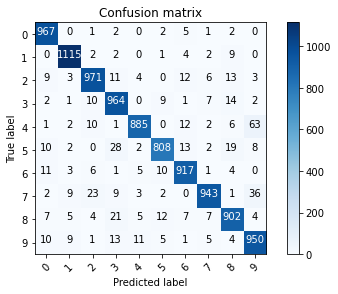

In [126]:
plot_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plot_confusion_matrix(cm=matrix, classes=plot_labels)

In [127]:
# Save the model
import os.path as path
model.save('Documents/mnist.h5')